# **1. Perkenalan**
Nama  : Rizky Stiawan Pratama <br>
Batch : HCK-024

**Objektif** <br>
Membangun model machine learning yang mampu memprediksi harga jual mobil bekas berdasarkan berbagai fitur seperti spesifikasi teknis, jenis mobil, konsumsi bahan bakar, dan lainnya. Model ini akan membantu penjual mobil bekas untuk menentukan harga yang wajar.

- Dengan prediksi harga yang akurat, proses jual-beli mobil bekas dapat menjadi lebih efisien, mengurangi waktu negosiasi, dan meningkatkan transparansi harga.
- Model prediksi ini dapat membantu pembeli dan penjual untuk segera menentukan harga berdasarkan data objektif
- Membantu penjual mendapatkan harga pasar terbaik untuk kendaraan mereka dan pembeli mendapatkan harga yang wajar sesuai kondisi mobil
- Adapaun artikel atau saran yang dimaksud dari poin diatas, akan diambil dari Internet dengan sumber yang jelas dan tentunya kredibel.

**Justifikasi**
- [kompas.com](https://indeks.kompas.com/topik-pilihan/list/8894/harga-mobil-bekas-2024)
- [mocil.id](https://www.mocil.id/blog/tren-harga-mobil-bekas-2024-apa-yang-perlu-anda-ketahui)
- [suara.com](https://www.suara.com/otomotif/2023/12/11/210056/ini8-faktor-yang-mempengaruhi-harga-jual-mobil-makin-standar-makin-oke)

**User**
- Penjual Mobil Bekas

**Latar Belakang Masalah** <br>
Pada pasar otomotif, menentukan harga jual mobil bekas sering menjadi tantangan bagi penjual dan pembeli. Harga mobil bekas dipengaruhi oleh berbagai faktor seperti merek, model, tahun pembuatan, kilometer yang telah ditempuh, kapasitas mesin, dan lainnya. Penilaian harga yang tidak akurat dapat menyebabkan. Dalam pasar mobil bekas, penentuan harga seringkali bersifat subjektif dan bergantung pada pengalaman atau penilaian pribadi.<br>
Hal ini dapat menyebabkan:
- Harga jual yang tidak kompetitif.
- Ketidakadilan dalam transaksi.
- Kurangnya transparansi dalam proses negosiasi.
- Maka, diperlukan sistem prediksi yang objektif untuk menentukan harga berdasarkan data historis dan spesifikasi kendaraan.



**Penjabaran Masalah** <br>
Proyek ini akan menjawab beberapa pertanyaan utama:
- Bagaimana menentukan fitur-fitur yang paling memengaruhi harga mobil bekas?
- Algoritma apa yang paling sesuai untuk memprediksi harga?
- Seberapa akurat model ini dalam memberikan estimasi harga?

**SMART Goals**
- Specific: Memberikan estimasi harga mobil bekas secara akurat kepada penjual, berdasarkan spesifikasi mobil dan kondisi pasar terkini, sehingga mempermudah proses negosiasi harga dengan pembeli.

- Measurable: Estimasi harga memiliki tingkat akurasi yang dapat diukur dengan perbandingan antara harga prediksi dan harga jual sebenarnya, dengan target kesalahan prediksi kurang dari 10%.

- Achievable: Fitur-fitur utama seperti spesifikasi kendaraan (tipe, merek, ukuran mesin), konsumsi bahan bakar, dan konfigurasi teknis digunakan untuk menciptakan estimasi yang relevan dan dapat diandalkan.

- Relevant: Solusi ini membantu penjual menentukan harga jual yang kompetitif dan transparan, meningkatkan daya tarik mobil bekas di pasar dan mempercepat proses penjualan.

- Time-bound: Sistem prediksi harga mobil bekas dapat digunakan oleh penjual dalam waktu kurang dari 2 minggu dari pengembangannya.

**Problem Statement** <br>
Bagaimana membangun model prediksi yang akurat untuk menentukan harga jual mobil bekas menggunakan data historis dan spesifikasi teknis kendaraan, sehingga dapat meningkatkan kepercayaan dan efisiensi dalam proses jual-beli?

# **2. Import Libraries**

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Vizualitation
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from feature_engine.outliers import Winsorizer

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer

# Model Evaluation
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Model Saving
import pickle
import joblib

# **3. Data Loading**

URL Dataset : https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/dat

| Column | Description |
| --- | --- |
| Car_ID | ID Unik untuk setiap observasi (Integer) |
| Symboling  | Peringkat risiko asuransi yang diberikan: Nilai +3 menunjukkan bahwa mobil berisiko, sedangkan -3 menunjukkan bahwa mobil mungkin cukup aman. (Kategorikal) |
| carCompany | Nama perusahaan mobil (Kategorikal) |
| fueltype | Jenis bahan bakar mobil, yaitu gas atau diesel (Kategorikal) |
| aspiration | Jenis aspirasi yang digunakan pada mobil (Kategorikal) |
| doornumber | Jumlah pintu pada mobil (Kategorikal) |
| carbody | Bentuk bodi mobil (Kategorikal) |
| drivewheel | Jenis roda penggerak mobil (Kategorikal) |
| enginelocation | Lokasi mesin mobil (Kategorikal) |
| wheelbase | Jarak sumbu roda mobil (Numerik) |
| carlength | Panjang mobil (Numerik) |
| carwidth | Lebar mobil (Numerik) |
| carheight | Tinggi mobil (Numerik) |
| curbweight | Berat mobil tanpa penumpang atau bagasi (Numerik) |
| enginetype | Jenis mesin mobil (Kategorikal) |
| cylindernumber | Jumlah silinder pada mobil (Kategorikal) |
| enginesize | Ukuran mesin mobil (Numerik) |
| fuelsystem | Sistem bahan bakar mobil (Kategorikal) |
| boreratio | Rasio lubang mesin pada mobil (Numerik) |
| stroke | Langkah atau volume di dalam mesin (Numerik) |
| compressionratio | Rasio kompresi mobil (Numerik) |
| horsepower | Tenaga kuda mobil (Numerik) |
| peakrpm | RPM puncak mobil (Numerik) |
| citympg | Konsumsi bahan bakar di dalam kota (Numerik) |
| highwaympg | Konsumsi bahan bakar di jalan raya (Numerik) |
| price(Dependent variable) | Harga mobil (Numerik) |

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [4]:
# Mengekstrak jenis mobil dari kolom CarName
df['Type'] = df['CarName'].str.split(pat=' ', n=1).str[1]  # Ekstrak Type Mobil
df['Brand'] = df['CarName'].str.split(pat=' ', n=1).str[0]  # Ekstrak Brand

# Masukkan kolom Merek dan Jenis sesuai urutan yang diinginkan
df.insert(1, 'Type', df.pop('Type'))
df.insert(1, 'Brand', df.pop('Brand'))

# Menampilkan DataFrame
df.head()

,car_ID,Brand,Type,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,giulia,3,alfa-romero giulia,gas,std,two,convertible,rwd,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,stelvio,3,alfa-romero stelvio,gas,std,two,convertible,rwd,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,Quadrifoglio,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,100 ls,2,audi 100 ls,gas,std,four,sedan,fwd,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,100ls,2,audi 100ls,gas,std,four,sedan,4wd,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Memisahkan `CarName` menjadi kolom `Brand` dan kolom `Type`

In [5]:
df['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
def fix_brand(df, old_name, new_name):
    df['Brand'] = df['Brand'].replace(old_name, new_name)

# Memanggil fungsi perbaikan
fix_brand(df, 'maxda', 'mazda')
fix_brand(df, 'nissan', 'Nissan')
fix_brand(df, 'porcshce', 'porsche')
fix_brand(df, 'toyouta', 'toyota')
fix_brand(df, 'vokswagen', 'volkswagen')
fix_brand(df, 'vw', 'volkswagen')

# Menampilkan nilai unik dari kolom 'Brand'
df['Brand'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Memperbaiki Typo pada values di kolom `Brand`

In [7]:
df['Type'].unique()

array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'MU-X', 'D-Max ', 'D-Max V-Cross', 'xj', 'xf',
       'xk', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc',
       'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'versa',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'cli

In [8]:
def fix_type(df, old_name, new_name):
    df['Type'] = df['Type'].replace(old_name, new_name)

# Memanggil fungsi perbaikan
fix_type(df, '100ls', '100 Ls')

# Menampilkan nilai unik dari kolom 'type'
df['Type'].unique()


array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100 Ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'MU-X', 'D-Max ', 'D-Max V-Cross', 'xj', 'xf',
       'xk', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc',
       'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'versa',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'cl

Memperbaiki Typo pada values di kolom `Type`

In [9]:
df.drop(['car_ID','CarName','symboling'], axis=1, inplace=True)

`car_ID` dan `symboling` hanyalah penghitung numerik untuk mobil, tidak akan terpakai untuk analisis dan dapat diabaikan. `CarName` dihapus karena telah dibuat kolom Brand dan Type

In [10]:
# Identifikasi kolom kategoris dari kumpulan data
categorical_columns = ['Brand', 'Type', 'fueltype', 'aspiration', 'doornumber',
                       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
                       'cylindernumber', 'fuelsystem']

# Ubah values dalam kolom kategoris menjadi huruf besar
for column in categorical_columns:
    df[column] = df[column].str.title()

# Menampilkan Dataframe
df.head()


,Brand,Type,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,Alfa-Romero,Giulia,Gas,Std,Two,Convertible,Rwd,Front,88.6,168.8,...,130,Mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,Alfa-Romero,Stelvio,Gas,Std,Two,Convertible,Rwd,Front,88.6,168.8,...,130,Mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,Alfa-Romero,Quadrifoglio,Gas,Std,Two,Hatchback,Rwd,Front,94.5,171.2,...,152,Mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,Audi,100 Ls,Gas,Std,Four,Sedan,Fwd,Front,99.8,176.6,...,109,Mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,Audi,100 Ls,Gas,Std,Four,Sedan,4Wd,Front,99.4,176.6,...,136,Mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.isna().sum()

Brand               0
Type                2
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Terdapat 2 Missing Values pada kolom `Type`

In [12]:
# Menampilkan baris dengan missing value di kolom 'Type'
missing_values = df[df['Type'].isnull()].head(2)
missing_values


,Brand,Type,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
138,Subaru,NaN,Gas,Std,Two,Hatchback,Fwd,Front,93.7,156.9,...,97,2Bbl,3.62,2.36,9.0,69,4900,31,36,5118.0
141,Subaru,NaN,Gas,Std,Four,Sedan,Fwd,Front,97.2,172.0,...,108,2Bbl,3.62,2.64,9.5,82,4800,32,37,7126.0


Terdapat 2 missing value di kolom `Type` dikarenakan tidak memiliki type mobil saat ekstraksi kolom dari `CarName` dan `Brand`

In [13]:
# Mengisi missing value di kolom 'Type' secara manual berdasarkan analisa
df.loc[138, 'Type'] = 'Dl'   # Missing value pertama diisi dengan 'Subaru Dl'
df.loc[141, 'Type'] = 'Brz'  # Missing value kedua diisi dengan 'Brz'

# Verifikasi perubahan
missing_values_handling = df['Type'].isnull().sum()
df.loc[[138, 141], ['Type']]  # Menampilkan hasil perubahan untuk kedua indeks


,Type
138,Dl
141,Brz


Handling Missing Value dengan Type yang sesuai berdasarkan kolom `carbody`, `drivewheel`, `enginelocation`, `wheelbase`, `carlength`, `carwidth` `carheight`

In [14]:
df.isna().sum()

Brand               0
Type                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Sudah tidak terdapat missing value

In [15]:
df.duplicated().sum()

0

Tidak terdapat duplikasi data dalam dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             205 non-null    object 
 1   Type              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

# **4. EDA**

In [17]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Distribusi Data :**
- Fitur seperti lebar mobil (`carwidth`), berat kotor (`curbweight`), dan ukuran mesin (`enginesize`) menunjukkan variabilitas yang signifikan.
- Ada kemungkinan outlier pada `compressionratio` dan `horsepower`.

**Rentang Harga :** <br>
Harga Rata-rata: $13,276, dengan harga minimum $5,118 dan maksimum $45,400

**Keanekaragaman Mobil :**
 - Data ini terdiri dari 205 model mobil.
 - Mobil memiliki Kapasitas Mesin, Ukuran dan berat yang bervariasi

In [18]:
# Define kolom kategori untuk dianalisis
cat_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
            'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Define kolom Numerik untuk dianalisis
num_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
            'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
            'peakrpm', 'citympg', 'highwaympg', 'price']

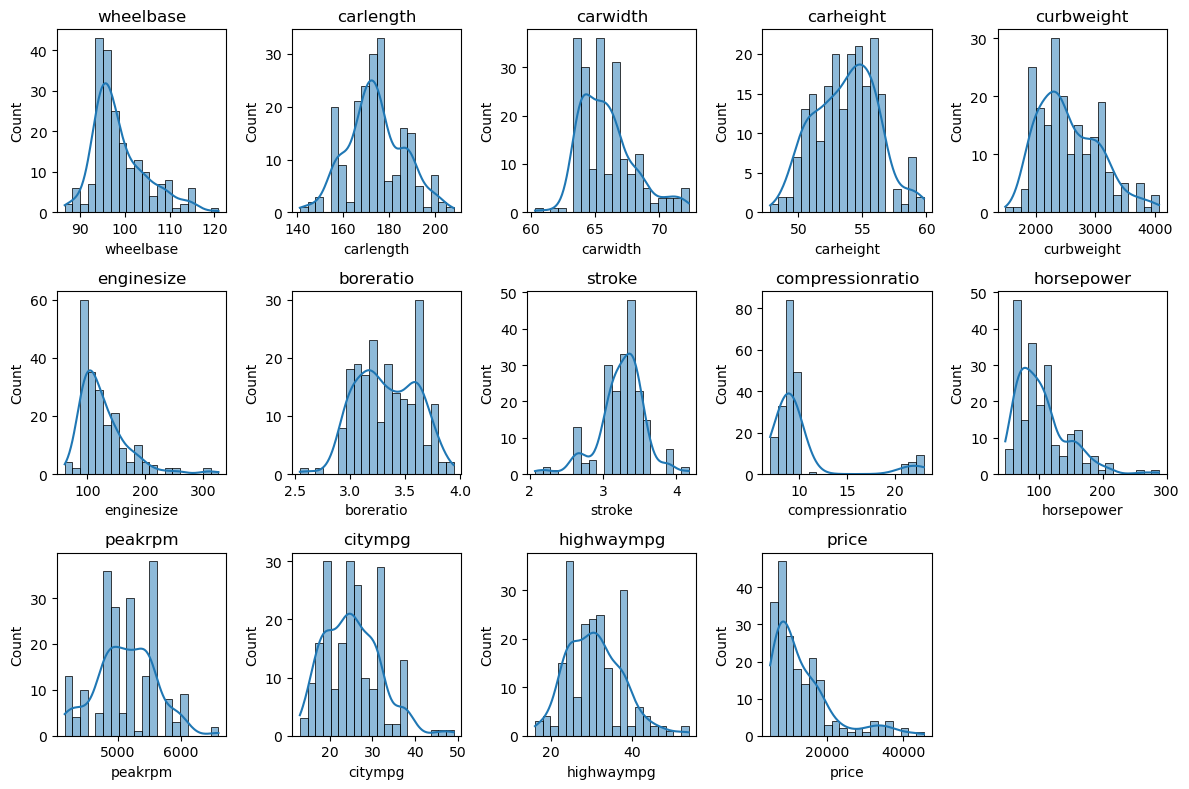

In [19]:
# Cek Distribusi kolom Numerik
plt.figure(figsize=(12, 8))
for feature in num_cols:
    plt.subplot(3, 5, num_cols.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

**Analisis** <br>
- Sebagian besar fitur memiliki distribusi Right-skewed, mencerminkan kehadiran outlier pada kategori tertentu (misalnya, `horsepower`, `enginesize`, dan `price`).<br>
- Fitur seperti `curbweight`, `horsepower`, dan `enginesize` cenderung berpengaruh besar terhadap harga.

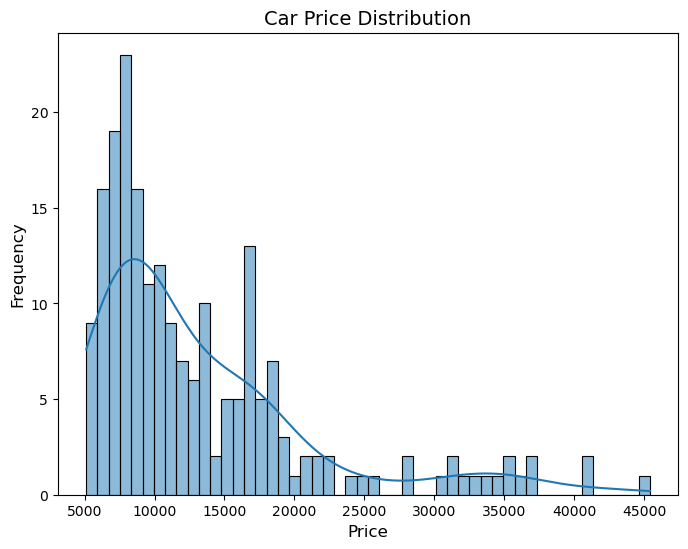

In [20]:
# Visualisasi Target
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Car Price Distribution', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

- Mobil bekas dengan harga yang lebih murah lebih umum dalam dataset, Sesuai dengan pola pasar di mana mobil dengan harga terjangkau lebih mudah dijual.
- Harga tinggi merupakan outlier tetapi dalam data set ini mencerminkan mobil mewah sport dan tidak akan di handling outliers karena kolom `price` adalah __Target__.

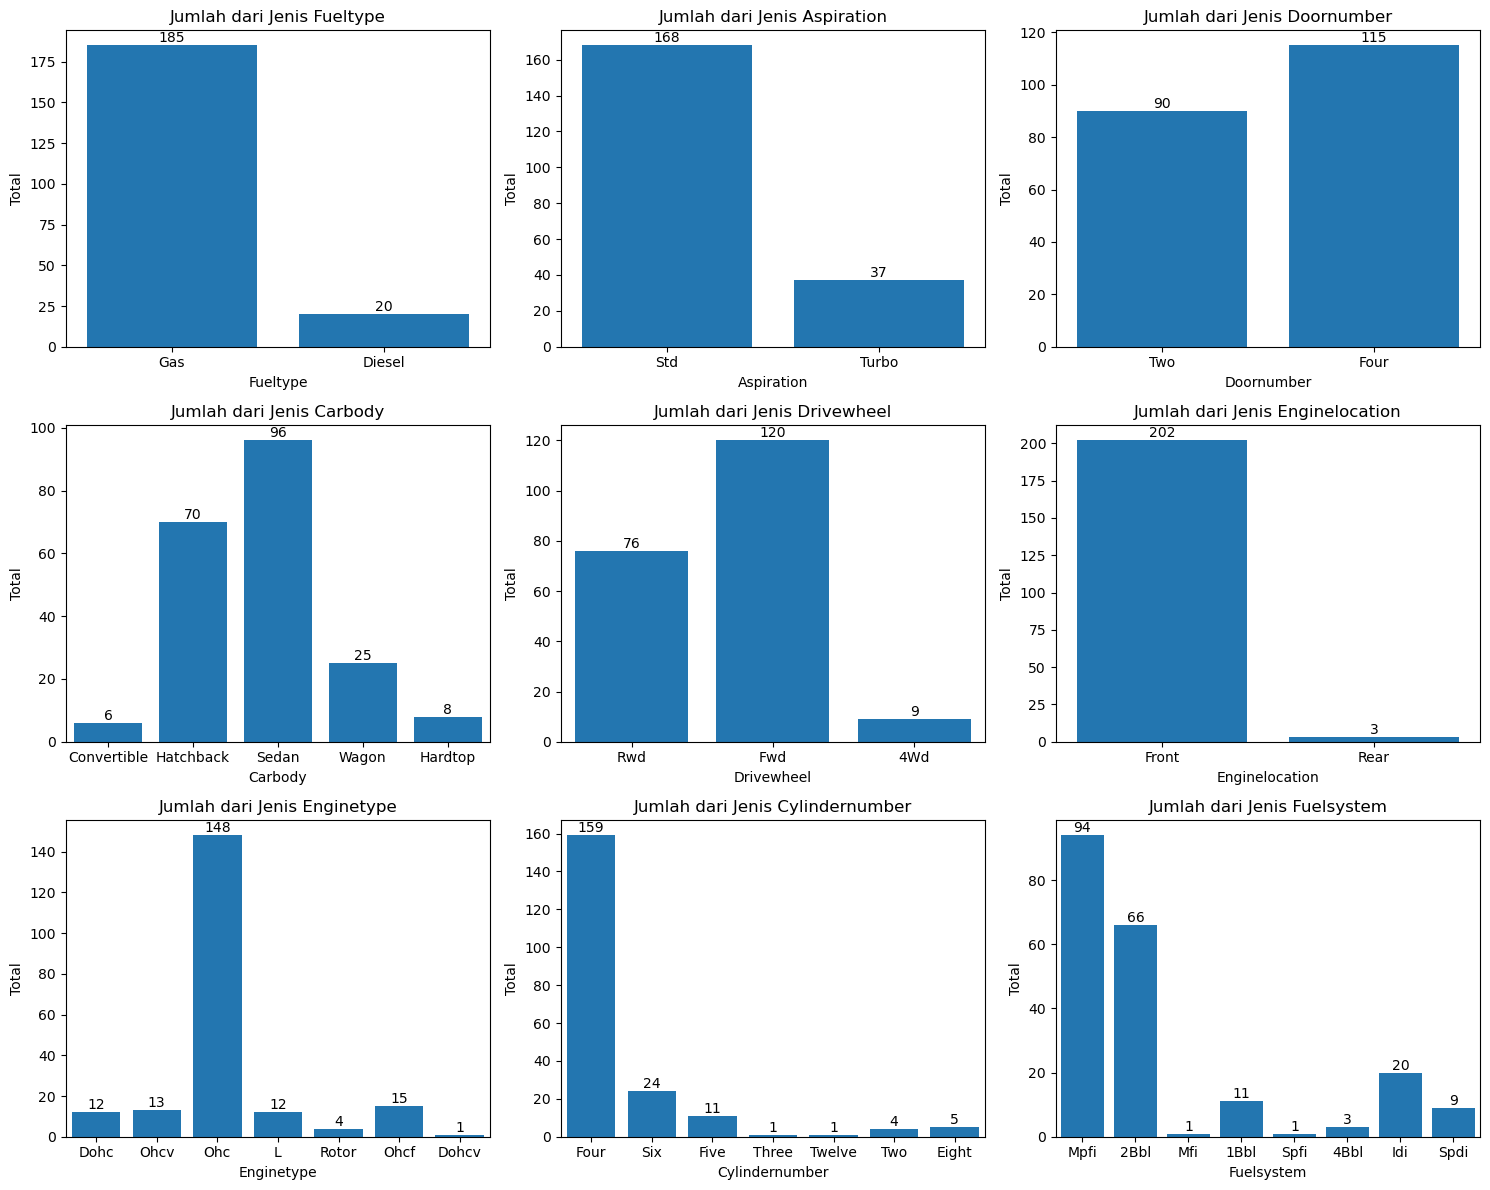

In [21]:
# Membuat Subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.ravel() 

# Looping untuk setiap kolom kategori
for i, column in enumerate(cat_cols):
    sns.countplot(x=column, data=df, ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Jumlah dari Jenis {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Total')

# Menampilkan plot
plt.tight_layout()
plt.show()


> **Analisis**
- Sebagian besar mobil dalam dataset menggunakan bahan bakar gas (bensin)
- Turbo tidak umum digunakan dalam mobil di dataset ini
- Sebagian besar mobil memiliki 4 pintu, yang menunjukkan preferensi pada mobil keluarga atau sedan.
- Sedan dan hatchback adalah tipe bodi yang paling umum.
- Mobil dengan penggerak roda depan (FWD) mendominasi.
- Mesin di depan adalah standar umum untuk desain mobil.
- Mesin dengan tipe overhead camshaft (Ohc) paling umum digunakan.
- Mobil dengan mesin 4 silinder paling umum, yang sesuai dengan mobil hemat bahan bakar.
- Sistem multi-point fuel injection (Mpfi) adalah yang paling banyak digunakan.

> **Kesimpulan**<br>
- Dataset ini didominasi oleh mobil dengan bahan bakar bensin, aspirasi standar, penggerak roda depan, mesin dengan lokasi depan, dan bodi sedan.
- Mesin paling umum adalah tipe overhead camshaft (Ohc) dengan 4 silinder.
- Mobil-mobil dalam dataset ini cenderung merepresentasikan desain dan konfigurasi umum yang sesuai dengan kebutuhan pasar.

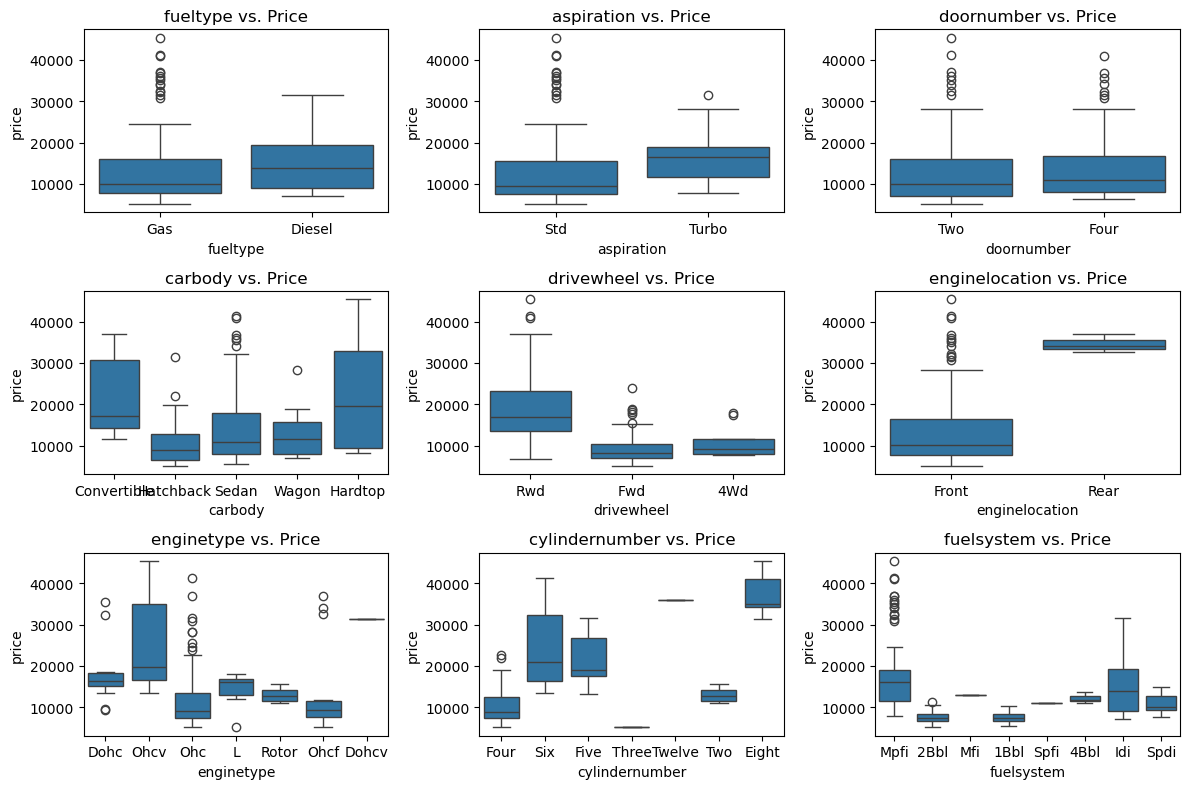

In [22]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in cat_cols:
    plt.subplot(3, 3, cat_cols.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

> **Analisis**
- **Fueltype :** Mobil diesel cenderung memiliki harga rata-rata sedikit lebih tinggi dibandingkan dengan mobil gas. Beberapa mobil dengan bahan bakar gas memiliki harga sangat tinggi (outlier)

- **Aspiration :** Mobil dengan aspirasi turbo memiliki harga rata-rata lebih tinggi dibandingkan dengan aspirasi standar (std). Banyak mobil dengan aspirasi standar yang memiliki harga sangat tinggi (outliers)

- **Doornumber :** Mobil dengan dua pintu memiliki harga rata-rata hampir sama dengan mobil empat pintu, meskipun terdapat beberapa outlier dengan harga tinggi pada kategori dua pintu

- **Carbody :** Convertible dan hardtop adalah bodi yang lebih premium, sementara hatchback lebih ekonomis.

- **Drivewheel :** Mobil dengan rear-wheel drive (RWD) memiliki harga rata-rata yang jauh lebih tinggi dibandingkan dengan front-wheel drive (FWD) dan 4-wheel drive (4WD). namun terdapat Outliers: Beberapa mobil FWD memiliki harga sangat tinggi.

- **Enginelocation :** Mobil dengan mesin di rear (belakang) memiliki harga rata-rata jauh lebih tinggi dibandingkan dengan mesin di depan (front). Lokasi mesin di belakang adalah ciri khas mobil premium atau sport.

- **Enginetype :** Ohc adalah jenis mesin yang paling umum dan memiliki variasi harga yang besar. Mesin dohcv cenderung memiliki harga rata-rata lebih tinggi dibandingkan dengan jenis mesin lainnya.

- **Cylindernumber :** Empat silinder (four) adalah yang paling umum dengan harga rata-rata lebih rendah, Jumlah silinder yang lebih banyak cenderung meningkatkan harga, mencerminkan performa yang lebih tinggi.

- **Fuelsystem :** Mobil dengan mpfi (multi-point fuel injection) mendominasi berbagai rentang harga, Sistem bahan bakar seperti idi dan spdi terkait dengan harga rata-rata yang lebih tinggi.

> **Kesimpulan**
- Fitur seperti drivewheel (RWD), enginelocation (rear), carbody (convertible/hardtop), dan cylindernumber (eight) menunjukkan hubungan yang jelas dengan mobil mewah dan harga tinggi.
- Fitur seperti fueltype dan doornumber memiliki dampak kecil terhadap harga.

<Axes: title={'center': 'Harga Mobil'}, ylabel='price'>

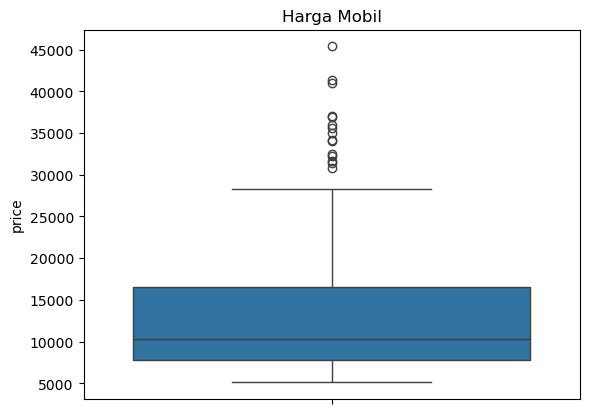

In [23]:
plt.title('Harga Mobil')
sns.boxplot(df['price'])

**Kesimpulnan**
- Sebagian besar mobil dalam dataset memiliki harga yang relatif terjangkau, tetapi ada sejumlah kecil mobil dengan harga jauh di atas rata-rata, Harga mobil yang berada di atas 30.000 hingga 45.000 dianggap sebagai outlier.
- Outliers ini kemungkinan besar merepresentasikan mobil mewah atau sport, yang memang memiliki harga premium secara realistis.
- Karena outlier ini valid dan mencerminkan kondisi nyata, tidak akan dilakukan handling outliers seperti capping atau penghapusan.

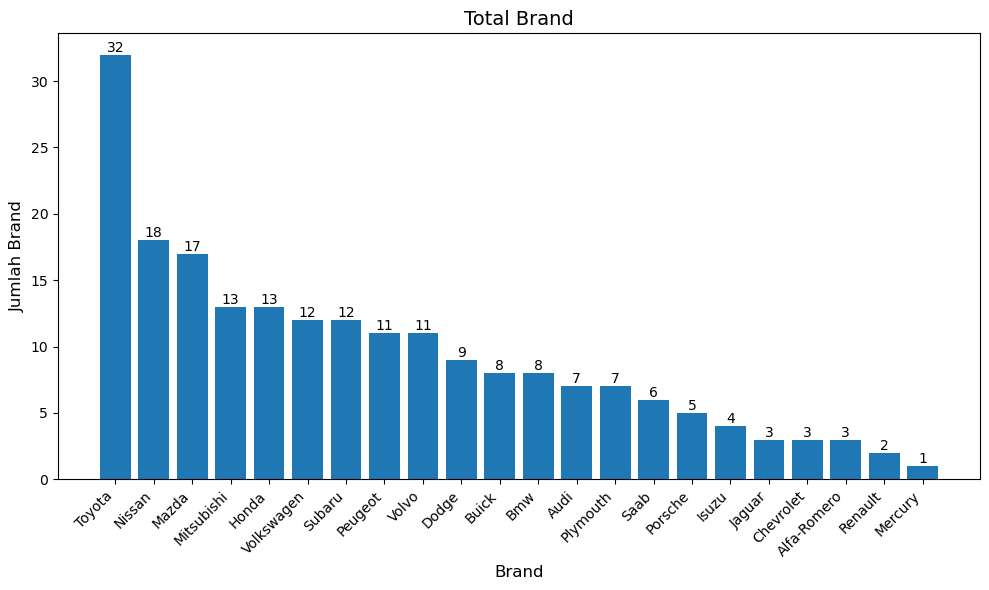

In [24]:
# Menghitung Jumlah Brand
brand_counts = df['Brand'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(brand_counts.index, brand_counts.values)

# Menambahkan angka di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)), ha='center', va='bottom')

# Menambahkan judul dan label
plt.title('Total Brand', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Jumlah Brand', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Menampilkan grafik
plt.show()

- Brand Populer: <br>
Toyota memiliki Varian model yang jauh lebih tinggi dibandingkan Brand lain, yang dapat menunjukkan bahwa mobil Toyota lebih diminati atau lebih banyak tersedia dalam dataset.

- Diversitas Penjualan:<br>
Ada distribusi jumlah Brand mobil yang cukup merata di antara Brand-Brand lainnya seperti Nissan, Mazda, dan Mitsubishi.

- Brand dengan Model Rendah:<br>
Renault dan Mercury perlu diteliti lebih lanjut apakah Brand kurang diminati atau hanya memiliki sedikit data dalam dataset.

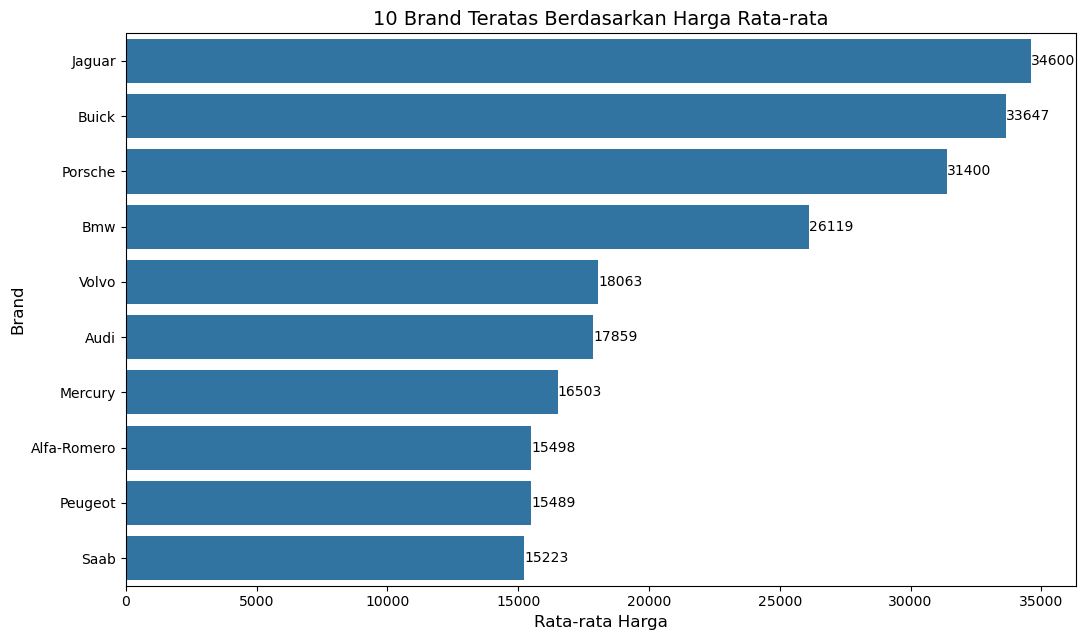

In [25]:
# Hitung harga rata-rata untuk setiap Brand
avg_prices = df.groupby('Brand')['price'].mean().sort_values(ascending=False)

# Plot Brand teratas berdasarkan harga rata-rata
n = 10  # Jumlah Brand teratas untuk diplot
top_type = avg_prices.head(n)

plt.figure(figsize=(11, 6.5))
ax = sns.barplot(x=top_type.values, y=top_type.index)

# Tambahkan angka di ujung setiap bar
for i, value in enumerate(top_type.values):
    plt.text(value, i, f'{value:.0f}', va='center', ha='left', fontsize=10)

plt.title(f'{n} Brand Teratas Berdasarkan Harga Rata-rata', fontsize=14)
plt.xlabel('Rata-rata Harga', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.tight_layout()
plt.show()

Visualisasi ini menunjukkan bahwa harga rata-rata mobil sangat dipengaruhi oleh positioning brand di pasar:

- `Brand` premium seperti Jaguar dan Porsche mendominasi kategori harga tertinggi.
- `Brand` menengah seperti Volvo dan Audi menawarkan mobil berkualitas dengan harga lebih terjangkau.
- `Brand` dengan harga lebih rendah di daftar top 10, seperti Peugeot dan Saab, mungkin fokus pada efisiensi biaya.

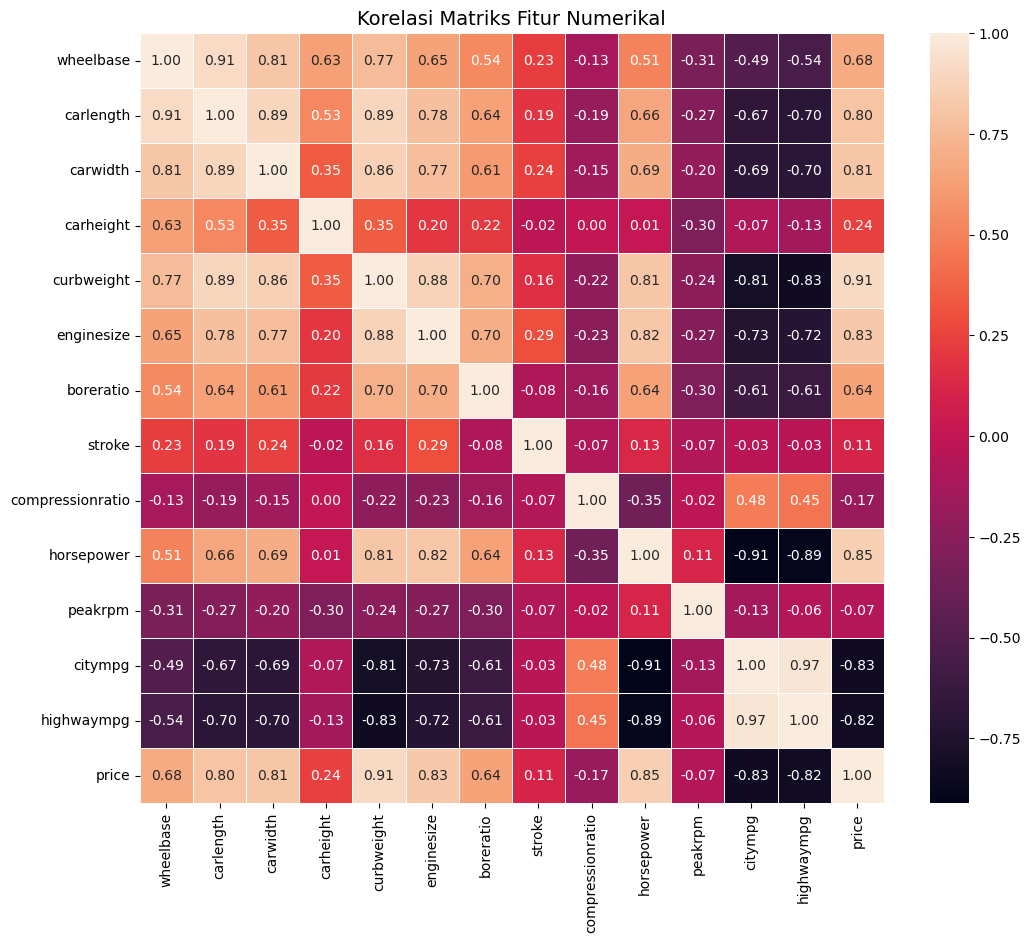

In [26]:
#memilih kolom numerik
numeric_df = df.select_dtypes(include=np.number)

#mengitung matriks korelasi
correlation_matrix = numeric_df.corr('spearman')

#plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Korelasi Matriks Fitur Numerikal', fontsize=14)
plt.show()

Menggunakan Spearman dikarenakan Data tidak berdistribusi normal (data skewed) dan masih adanya outliers

**Korelasi terhadap `price` (Harga Mobil):**
- Korelasi Positif Tinggi:
    + `curbweight` (0.91): Bobot kendaraan tanpa penumpang atau barang memiliki hubungan yang sangat kuat dengan harga mobil.
    + `enginesize` (0.83): Ukuran mesin sangat berhubungan dengan harga mobil.
    + `horsepower` (0.85): Tenaga kuda juga merupakan faktor signifikan dalam menentukan harga mobil.
    + `carwidth` (0.81): Lebar mobil juga memiliki hubungan positif kuat dengan harga.
- Korelasi Negatif:
    + `citympg` (-0.83) dan `highwaympg` (-0.82): Efisiensi bahan bakar cenderung memiliki hubungan negatif dengan harga, mungkin karena mobil yang lebih hemat bahan bakar biasanya lebih terjangkau.

**Kesimpulan Korelasi**
- Fitur seperti `curbweight`, `enginesize`, dan `horsepower` sangat relevan untuk prediksi harga mobil.
- Mobil dengan efisiensi bahan bakar tinggi (nilai `citympg` atau `highwaympg` tinggi) cenderung lebih murah.
- Hubungan kuat antara `wheelbase` dan `carlength` menunjukkan bahwa desain mobil mungkin menjadi faktor dalam analisis.

# **5. Feature Engineering**

## **Split between X and y**

In [27]:
# Split Dataset
# Fitur
X = df.drop(['Brand','Type','price'], axis = 1)

# Target
y = df['price']

## **Split between Train-set and Test-set**

In [28]:
# Split train dan test rasio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(143, 22)
(143,)
(62, 22)
(62,)


## **Handling Cardinality**

In [29]:
# pilih kolom yang kategori
cat_cols = X_train.select_dtypes(include= 'object').columns.tolist()
cat_cols

#cek jumlah unique di kolom kategori
for col in cat_cols:
    print(f'jumlah unique value pada kolom {col}: {len(X_train[col].unique())}')

jumlah unique value pada kolom fueltype: 2
jumlah unique value pada kolom aspiration: 2
jumlah unique value pada kolom doornumber: 2
jumlah unique value pada kolom carbody: 5
jumlah unique value pada kolom drivewheel: 3
jumlah unique value pada kolom enginelocation: 2
jumlah unique value pada kolom enginetype: 7
jumlah unique value pada kolom cylindernumber: 6
jumlah unique value pada kolom fuelsystem: 7


> **Kesimpulan** <br>

**Kolom dengan Kardinalitas Rendah (<=3 unique values):**
- fueltype: 2 nilai unik (Gas, Diesel).
- aspiration: 2 nilai unik (Std, Turbo).
- doornumber: 2 nilai unik (Two, Four).
- drivewheel: 3 nilai unik (FWD, RWD, 4WD).
- enginelocation: 2 nilai unik (Front, Rear).

**Kolom dengan Kardinalitas Sedang (4-8 unique values):**
- carbody: 5 nilai unik (Convertible, Hatchback, Sedan, Wagon, Hardtop).
- enginetype: 7 nilai unik (DOHC, OHCV, OHC, dll.).
- cylindernumber: 7 nilai unik (Two, Four, Six, Eight, dll.).
- fuelsystem: 8 nilai unik (MPFI, 2BBL, SPDI, dll.).

**Encoding Metode:** <br>
Dalam tahapan ini akan menggunakan Kombinasi Encoding karena jika hanya menggunakan One Hot Encoding untuk semua kolom, model mungkin salah menginterpretasikan hubungan `ordinal` yang sebenarnya tidak ada pada kolom selain `cylindernumber`. <br>
Jika hanya menggunakan One-Hot Encoding, dimensi data bisa membesar, terutama jika ada banyak kolom dengan banyak kategori.


## **Handling Outliers**

In [30]:
#cek distribusi dari skewness
num_cols = list(X_train.select_dtypes(exclude='object').columns)
listItem= []
for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'Normal',
    'Skewed')])
skewness = pd.DataFrame(columns=['Nama Kolom', 'Nilai Skewness', 'Distribution'], data= listItem)
skewness


,Nama Kolom,Nilai Skewness,Distribution
0,wheelbase,1.0,Skewed
1,carlength,0.2,Normal
2,carwidth,1.0,Skewed
3,carheight,-0.0,Normal
4,curbweight,0.7,Skewed
5,enginesize,2.1,Skewed
6,boreratio,0.0,Normal
7,stroke,-0.7,Skewed
8,compressionratio,2.9,Skewed
9,horsepower,1.6,Skewed


In [31]:
# mencari upper, lower boundaries dan persentase dari outliers
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['Nama Kolom'][row]
  #cek upper dan lower boundaries
  if skewness['Distribution'][row] == 'Skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #menambahkan ke dalam list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'Column': column,
    #membulatkan values
    'Lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'Upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'Percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,Column,Lower_boundary,Upper_boundary,Percentage_total_outlier
0,wheelbase,71.40,125.30,0.00
1,carlength,137.43,211.88,0.00
2,carwidth,56.10,75.00,0.00
3,carheight,46.35,61.23,0.00
4,curbweight,-97.00,5240.50,0.00
5,enginesize,-31.00,270.00,1.40
6,boreratio,2.50,4.14,0.00
7,stroke,2.24,4.28,1.40
8,compressionratio,6.00,11.95,8.39
9,horsepower,-50.00,240.50,1.40


**Prioritas Penanganan** <br>
Berdasarkan jumlah outlier dan relevansi kolom terhadap model prediksi:

- Kolom dengan banyak outlier: <br>
`compressionratio` dan `stroke` menunjukkan distribusi yang sangat tidak normal.

- Kolom fitur penting: <br>
`enginesize`, `horsepower`, perlu diprioritaskan karena memiliki pengaruh langsung pada prediksi harga.

- Kolom dengan sedikit outlier:<br>
`wheelbase`, `highwaympg`, `peakrpm`, dan `citympg` tidak dilakukan Handling Outliers.

In [32]:
# Inisialisasi Winsorizer
winsor = Winsorizer(capping_method='iqr',  # Metode IQR
                    tail='both',           # Tangani outlier di kedua sisi (atas dan bawah)
                    fold=1.5,              # Batas IQR (1.5 kali IQR)
                    variables=['compressionratio', 'stroke', 'enginesize', 'horsepower'])

# Terapkan Winsorizer pada X_train
X_train_capped = winsor.fit_transform(X_train)
X_test_capped = winsor.transform(X_test)
# Tampilkan deskripsi statistik setelah Winsorizing
X_train_capped[['compressionratio', 'stroke', 'enginesize', 'horsepower']].describe()


,compressionratio,stroke,enginesize,horsepower
count,143.000000,143.000000,143.000000,143.000000
mean,9.025245,3.263147,124.325175,103.725524
std,0.790155,0.260577,32.614979,34.435044
min,7.275000,2.680000,70.000000,52.000000
25%,8.550000,3.115000,98.000000,74.500000
50%,9.000000,3.270000,120.000000,95.000000
75%,9.400000,3.405000,141.000000,116.000000
max,10.675000,3.840000,205.500000,178.250000


**Kesimpulan Mengapa Capping**
- Dataset hanya memiliki 205 baris: Sehingga Capping (Winsorizing) untuk menjaga semua data tetap ada.
- Mengontrol Outlier Ekstrem: Meningkatkan distribusi data tanpa kehilangan informasi.
- Model Sensitif terhadap Outlier: Capping membuat data lebih stabil untuk model seperti Linear Regression.
- Distribusi Lebih Normal: Menghilangkan dampak nilai ekstrem yang tidak proporsional

compressionratio - Before Capping


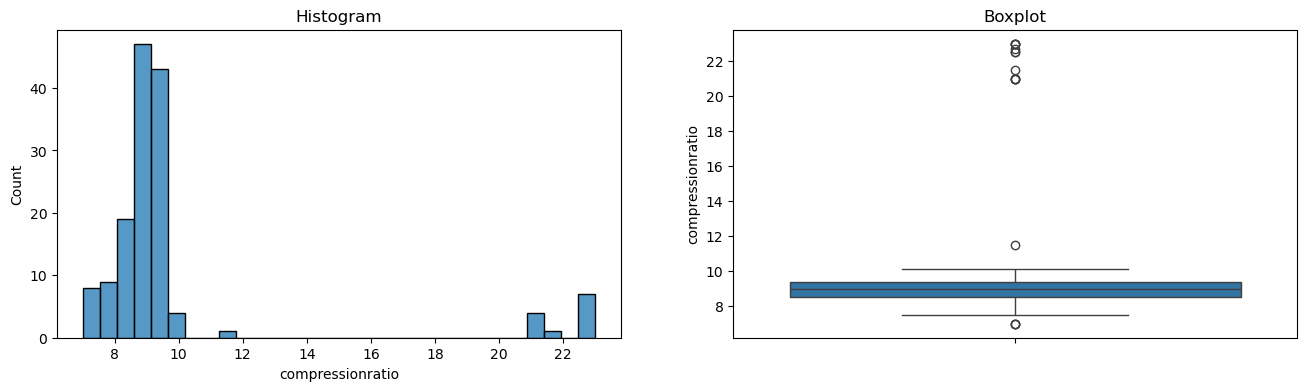


compressionratio - After Capping


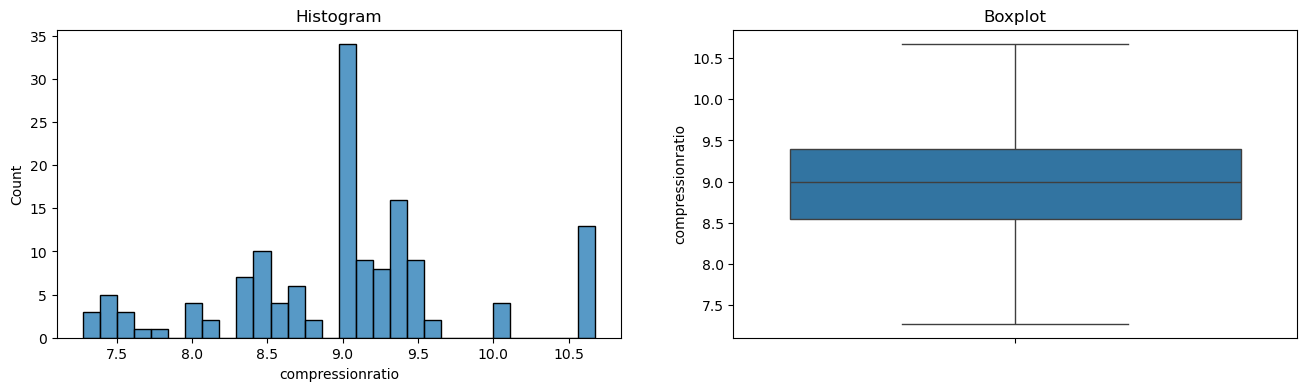

stroke - Before Capping


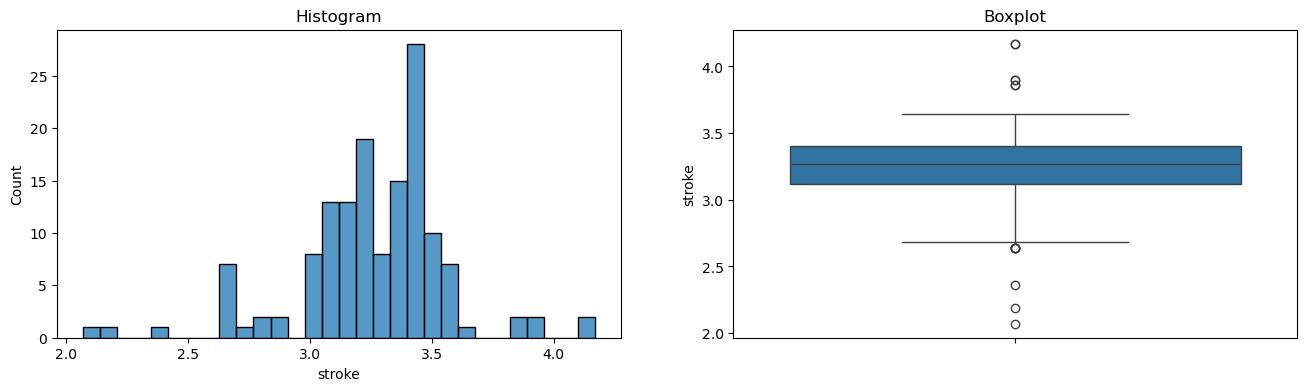


stroke - After Capping


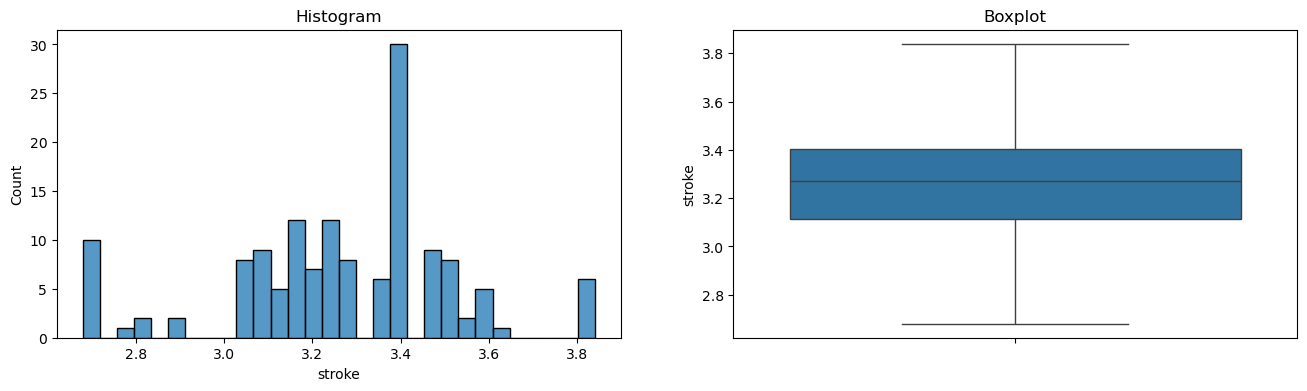

enginesize - Before Capping


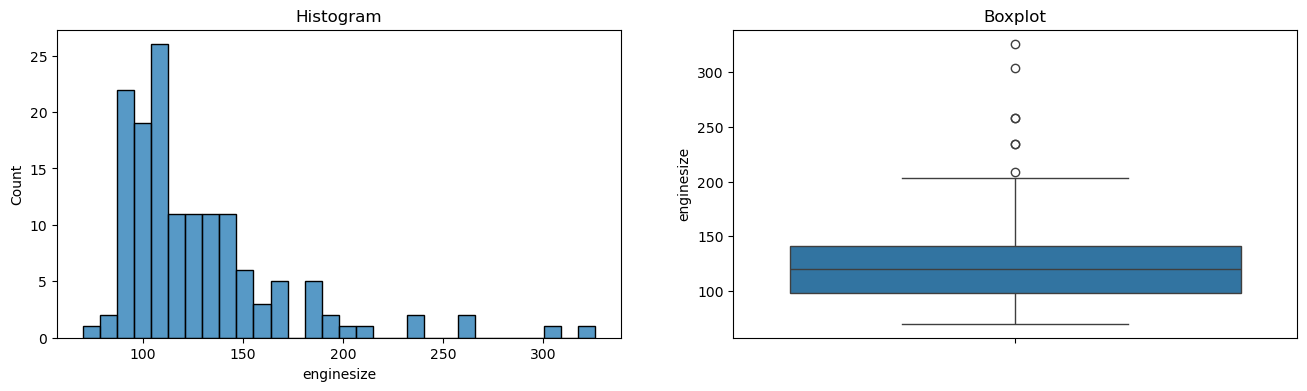


enginesize - After Capping


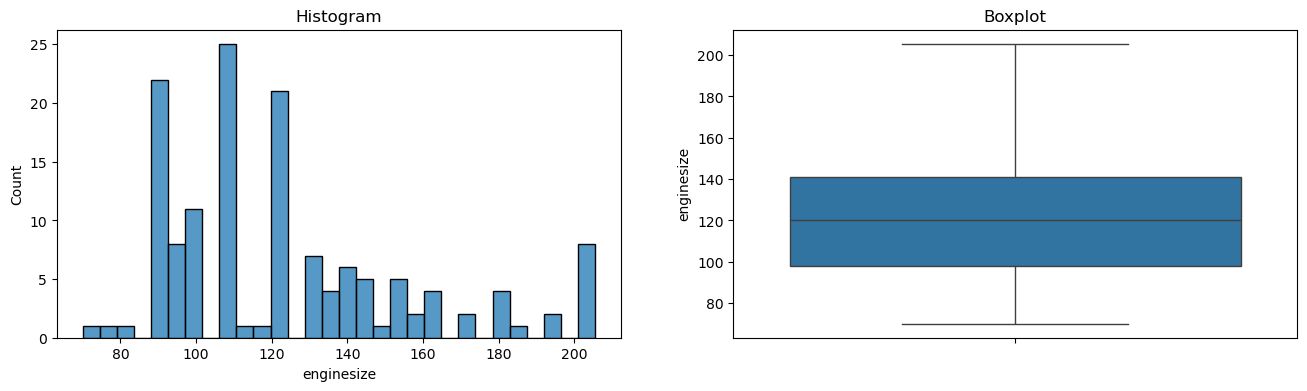

horsepower - Before Capping


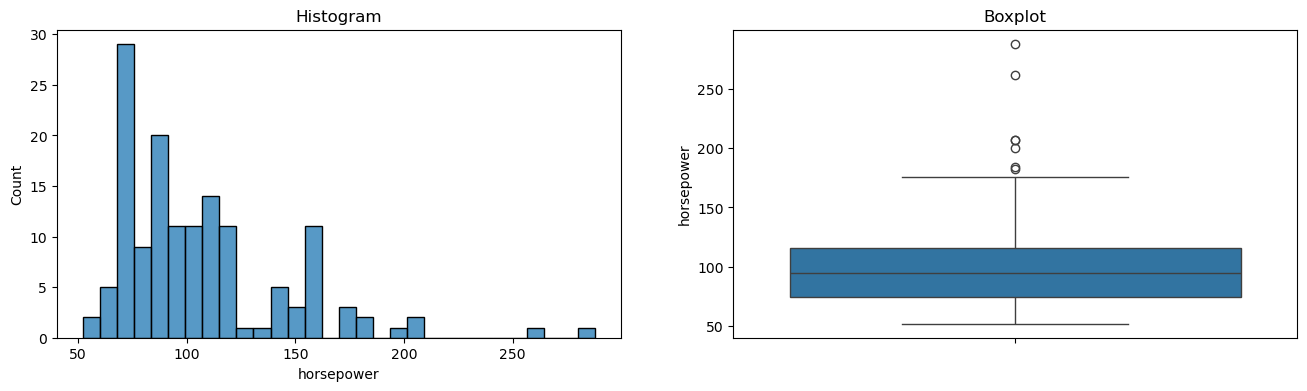


horsepower - After Capping


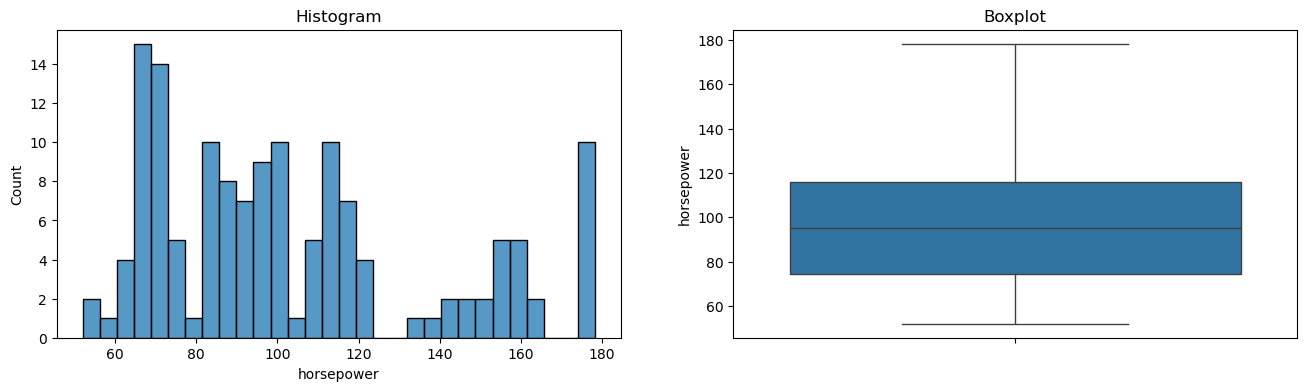

In [33]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# Menampilkan distribusi sebelum dan setelah capping
print('compressionratio - Before Capping')
diagnostic_plots(X_train, 'compressionratio')
print('\ncompressionratio - After Capping')
diagnostic_plots(X_train_capped, 'compressionratio')

print('stroke - Before Capping')
diagnostic_plots(X_train, 'stroke')
print('\nstroke - After Capping')
diagnostic_plots(X_train_capped, 'stroke')

print('enginesize - Before Capping')
diagnostic_plots(X_train,'enginesize')
print('\nenginesize - After Capping')
diagnostic_plots(X_train_capped,'enginesize')

print('horsepower - Before Capping')
diagnostic_plots(X_train,'horsepower')
print('\nhorsepower - After Capping')
diagnostic_plots(X_train_capped,'horsepower')

## **Handling Missing Value**

In [34]:
# Mengecek missing value X_train
X_train_capped.isnull().sum() 

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [35]:
# Mengecek missing value X_test
X_test_capped.isnull().sum()

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

Tidak terdapat Missing Value pada dataset ini

## **Split Between Numeric Columns and Categorical Columns**

In [36]:
# Split antara kolom numerik dan kategori
num_columns = X_train_capped.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train_capped.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
Categorical Columns:  ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


- Pemisahan kolom numerik dan kategorikal memungkinkan untuk mengaplikasikan teknik preprocessing yang sesuai untuk masing-masing tipe data.
- Hal ini penting untuk memastikan bahwa model machine learning dapat bekerja dengan data dalam format yang benar dan memanfaatkan karakteristik tipe data secara maksimal.

In [37]:
# Split antara kolom numerik dan kategori
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

X_train_num

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
177,102.4,175.6,66.5,53.9,2458,122.0,3.31,3.54,8.700,92.0,4200,27,32
75,102.7,178.4,68.0,54.8,2910,140.0,3.78,3.12,8.000,175.0,5000,19,24
174,102.4,175.6,66.5,54.9,2480,110.0,3.27,3.35,10.675,73.0,4500,30,33
31,86.6,144.6,63.9,50.8,1819,92.0,2.91,3.41,9.200,76.0,6000,31,38
12,101.2,176.8,64.8,54.3,2710,164.0,3.31,3.19,9.000,121.0,4250,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,99.2,178.5,67.9,49.7,3139,181.0,3.43,3.27,9.000,160.0,5200,19,25
14,103.5,189.0,66.9,55.7,3055,164.0,3.31,3.19,9.000,121.0,4250,20,25
92,94.5,165.3,63.8,54.5,1938,97.0,3.15,3.29,9.400,69.0,5200,31,37
179,102.9,183.5,67.7,52.0,3016,171.0,3.27,3.35,9.300,161.0,5200,19,24


In [38]:
X_train_cat

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
177,Gas,Std,Four,Hatchback,Fwd,Front,Ohc,Four,Mpfi
75,Gas,Turbo,Two,Hatchback,Rwd,Front,Ohc,Four,Mpfi
174,Diesel,Turbo,Four,Sedan,Fwd,Front,Ohc,Four,Idi
31,Gas,Std,Two,Hatchback,Fwd,Front,Ohc,Four,1Bbl
12,Gas,Std,Two,Sedan,Rwd,Front,Ohc,Six,Mpfi
...,...,...,...,...,...,...,...,...,...
106,Gas,Std,Two,Hatchback,Rwd,Front,Ohcv,Six,Mpfi
14,Gas,Std,Four,Sedan,Rwd,Front,Ohc,Six,Mpfi
92,Gas,Std,Four,Sedan,Fwd,Front,Ohc,Four,2Bbl
179,Gas,Std,Two,Hatchback,Rwd,Front,Dohc,Six,Mpfi


In [39]:
X_train_cat.nunique()

fueltype          2
aspiration        2
doornumber        2
carbody           5
drivewheel        3
enginelocation    2
enginetype        7
cylindernumber    6
fuelsystem        7
dtype: int64

In [40]:
df['cylindernumber'].unique()

array(['Four', 'Six', 'Five', 'Three', 'Twelve', 'Two', 'Eight'],
      dtype=object)

In [41]:
X_train_cat['cylindernumber'].unique()

array(['Four', 'Six', 'Five', 'Twelve', 'Eight', 'Two'], dtype=object)

kolom `cylindernumber` di dalam dataframe memiliki nilai Ordinal, yakni : <br>
Four', 'Six', 'Five', 'Three', 'Twelve', 'Two', 'Eight' <br>
Maka akan dilakukan Ordinal Encoding

## **Feature Encoding & Scaling**

In [42]:
# Kolom untuk encoding dan scaling
one_hot_encode_cols = ['drivewheel', 'carbody', 'enginetype', 'fuelsystem',
                       'fueltype', 'aspiration', 'doornumber', 'enginelocation']
ordinal_encode_cols = ['cylindernumber']


num_cols = [col for col in X_train.select_dtypes(include=['int64', 'float64']).columns if col not in one_hot_encode_cols + ordinal_encode_cols]

# Pipeline untuk data kategorikal One-Hot Encoding dan Ordinal Encoding
categorical_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), one_hot_encode_cols),
        ('ordinal', OrdinalEncoder(
            categories=[['Two', 'Three', 'Four', 'Five', 'Six', 'Eight', 'Twelve']], 
            handle_unknown='use_encoded_value', 
            unknown_value=-1), ordinal_encode_cols)
    ],
    remainder='drop'
)

# Pipeline untuk data numerik
numerical_transformer = StandardScaler()

# Gabungkan pipelines untuk data kategorikal dan numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),  # Scaling untuk numerik
        ('cat', categorical_transformer, one_hot_encode_cols + ordinal_encode_cols)  # Encoding untuk kategori
    ]
)

# Fit the preprocessor with training data
preprocessor.fit(X_train)

# Define final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Menerapkan pipeline pada data train dan test
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

**Kesimpulan**

Proses ini mempersiapkan data dengan memisahkan kolom numerik dan kategorikal, mengaplikasikan transformasi yang sesuai (scaling dan encoding), dan menghasilkan data yang siap untuk digunakan dalam model.

- Kolom Kategorikal:
Kolom yang akan di-encode menggunakan **One-Hot Encoding** untuk kategori yang lebih dari dua nilai, dan **Ordinal Encoding** untuk kolom yang memiliki urutan (seperti `cylindernumber`).
- Kolom Numerik:
Kolom yang akan di-scale menggunakan **StandardScaler** untuk memastikan semua fitur numerik berada dalam rentang yang sama (rata-rata 0, standar deviasi 1). <br>
- Menggunakan **StandardScaler** di sini berguna untuk menormalkan data numerik agar skala setiap fitur menjadi seragam, yang memungkinkan model untuk melakukan pelatihan lebih baik dan lebih cepat, terutama jika model yang digunakan sensitif terhadap perbedaan skala antar fitur


In [43]:
# Output dari data train dan test setelah preprocessing
print("Shape of Processed Training Data:", X_train_processed.shape)
print("Shape of Processed Test Data:", X_test_processed.shape)
preprocessor

Shape of Processed Training Data: (143, 44)
Shape of Processed Test Data: (62, 44)


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['wheelbase', 'carlength', 'carwidth',
                                  'carheight', 'curbweight', 'enginesize',
                                  'boreratio', 'stroke', 'compressionratio',
                                  'horsepower', 'peakrpm', 'citympg',
                                  'highwaympg']),
                                ('cat',
                                 ColumnTransformer(transformers=[('onehot',
                                                                  OneHotEncoder(handle_unknown='ignore'),
                                                                  ['drivewheel',
                                                                   'carbody',
                                                                   'enginetype',
                                                                   'fuelsystem',
                                                                   'fueltype',
                                                                   'aspiration',
                                                                   'doornumber',
                                                                   'enginelocation']),
                                                                 ('ordinal',
                                                                  OrdinalEncoder(categories=[['Two',
                                                                                              'Three',
                                                                                              'Four',
                                                                                              'Five',
                                                                                              'Six',
                                                                                              'Eight',
                                                                                              'Twelve']],
                                                                                 handle_unknown='use_encoded_value',
                                                                                 unknown_value=-1),
                                                                  ['cylindernumber'])]),
                                 ['drivewheel', 'carbody', 'enginetype',
                                  'fuelsystem', 'fueltype', 'aspiration',
                                  'doornumber', 'enginelocation',
                                  'cylindernumber'])])

In [44]:
X_train

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
177,Gas,Std,Four,Hatchback,Fwd,Front,102.4,175.6,66.5,53.9,...,Four,122,Mpfi,3.31,3.54,8.7,92,4200,27,32
75,Gas,Turbo,Two,Hatchback,Rwd,Front,102.7,178.4,68.0,54.8,...,Four,140,Mpfi,3.78,3.12,8.0,175,5000,19,24
174,Diesel,Turbo,Four,Sedan,Fwd,Front,102.4,175.6,66.5,54.9,...,Four,110,Idi,3.27,3.35,22.5,73,4500,30,33
31,Gas,Std,Two,Hatchback,Fwd,Front,86.6,144.6,63.9,50.8,...,Four,92,1Bbl,2.91,3.41,9.2,76,6000,31,38
12,Gas,Std,Two,Sedan,Rwd,Front,101.2,176.8,64.8,54.3,...,Six,164,Mpfi,3.31,3.19,9.0,121,4250,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Gas,Std,Two,Hatchback,Rwd,Front,99.2,178.5,67.9,49.7,...,Six,181,Mpfi,3.43,3.27,9.0,160,5200,19,25
14,Gas,Std,Four,Sedan,Rwd,Front,103.5,189.0,66.9,55.7,...,Six,164,Mpfi,3.31,3.19,9.0,121,4250,20,25
92,Gas,Std,Four,Sedan,Fwd,Front,94.5,165.3,63.8,54.5,...,Four,97,2Bbl,3.15,3.29,9.4,69,5200,31,37
179,Gas,Std,Two,Hatchback,Rwd,Front,102.9,183.5,67.7,52.0,...,Six,171,Mpfi,3.27,3.35,9.3,161,5200,19,24


# **6. Model Definition**

In [45]:
# cross validation ke model algoritma yang sudah ditentukan
pipe_linreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linear_regression', LinearRegression())
])

pipe_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

pipe_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm', SVR())
])

pipe_decisiontree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('decisiontree', DecisionTreeRegressor())
])

pipe_randomforest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('randomforest', RandomForestRegressor(random_state=42))
])

pipe_boosting = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gradient', GradientBoostingRegressor(random_state=42))
])

pipe_boosting2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor())
])

Mendefinisikan berbagai pipeline untuk algoritma yang berbeda, termasuk Linear Regression, KNN, SVM, Decision Tree, Random Forest, Gradient Boosting, dan XGBoost. Pipeline ini akan menggabungkan langkah preprocessing yang telah ditentukan sebelumnya dengan model yang sesuai.

In [53]:
# cross val linear regression dengan scoring MAE
cv_linreg = cross_val_score(pipe_linreg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('LinearRegression')
print(f'MAE {abs(cv_linreg.mean())}')
print('---------------------------------')

# cross val knn dengan scoring MAE
cv_knn = cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('KNeighborsRegressor')
print(f'MAE {abs(cv_knn.mean())}')
print('---------------------------------')

# cross val svm dengan scoring MAE
cv_svm = cross_val_score(pipe_svm, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('SVR')
print(f'MAE {abs(cv_svm.mean())}')
print('---------------------------------')

# cross val decision tree dengan scoring MAE
cv_decisiontree = cross_val_score(pipe_decisiontree, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('DecisionTreeRegressor')
print(f'MAE {abs(cv_decisiontree.mean())}')
print('---------------------------------')

# cross val random forest dengan scoring MAE
cv_randomforest = cross_val_score(pipe_randomforest, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('RandomForestRegressor')
print(f'MAE {abs(cv_randomforest.mean())}')
print('---------------------------------')

# cross val gradient boosting dengan scoring MAE
cv_gradient = cross_val_score(pipe_boosting, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('GradientBoostingRegressor')
print(f'MAE {abs(cv_gradient.mean())}')
print('---------------------------------')

# cross val xgboost dengan scoring MAE
cv_xgboost = cross_val_score(pipe_boosting2, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('XGBRegressor')
print(f'MAE {abs(cv_xgboost.mean())}')

# Rata-rata dari cross val score
cv_linreg_mean = cv_linreg.mean()
cv_knn_mean = cv_knn.mean()
cv_svm_mean = cv_svm.mean()
cv_decisiontree_mean = cv_decisiontree.mean()
cv_randomforest_mean = cv_randomforest.mean()


LinearRegression
MAE 2115.321871437644
---------------------------------
KNeighborsRegressor
MAE 2195.8708374384237
---------------------------------
SVR
MAE 5570.126155565212
---------------------------------
DecisionTreeRegressor
MAE 1870.3837438423645
---------------------------------
RandomForestRegressor
MAE 1653.0230942411447
---------------------------------
GradientBoostingRegressor
MAE 1591.236902824084
---------------------------------
XGBRegressor
MAE 1734.7538949449663


In [46]:
# cross val linear regression dengan scoring MAE
cv_linreg = cross_val_score(pipe_linreg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('LinearRegression')
print(f'MAE {abs(cv_linreg.mean())}')
print(f'standard deviation {cv_linreg.std()}')
print('---------------------------------')

# cross val knn dengan scoring MAE
cv_knn = cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('KNeighborsRegressor')
print(f'MAE {abs(cv_knn.mean())}')
print(f'standard deviation {cv_knn.std()}')
print('---------------------------------')

# cross val svm dengan scoring MAE
cv_svm = cross_val_score(pipe_svm, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('SVR')
print(f'MAE {abs(cv_svm.mean())}')
print(f'standard deviation {cv_svm.std()}')
print('---------------------------------')

# cross val decision tree dengan scoring MAE
cv_decisiontree = cross_val_score(pipe_decisiontree, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('DecisionTreeRegressor')
print(f'MAE {abs(cv_decisiontree.mean())}')
print(f'standard deviation {cv_decisiontree.std()}')
print('---------------------------------')

# cross val random forest dengan scoring MAE
cv_randomforest = cross_val_score(pipe_randomforest, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('RandomForestRegressor')
print(f'MAE {abs(cv_randomforest.mean())}')
print(f'standard deviation {cv_randomforest.std()}')
print('---------------------------------')

# cross val gradient boosting dengan scoring MAE
cv_gradient = cross_val_score(pipe_boosting, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('GradientBoostingRegressor')
print(f'MAE {abs(cv_gradient.mean())}')
print(f'standard deviation {cv_gradient.std()}')
print('---------------------------------')

# cross val xgboost dengan scoring MAE
cv_xgboost = cross_val_score(pipe_boosting2, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print('XGBRegressor')
print(f'MAE {abs(cv_xgboost.mean())}')
print(f'standard deviation {cv_xgboost.std()}')

# Rata-rata dari cross val score
cv_linreg_mean = cv_linreg.mean()
cv_knn_mean = cv_knn.mean()
cv_svm_mean = cv_svm.mean()
cv_decisiontree_mean = cv_decisiontree.mean()
cv_randomforest_mean = cv_randomforest.mean()


LinearRegression
MAE 2115.321871437644
standard deviation 199.91389971816895
---------------------------------
KNeighborsRegressor
MAE 2195.8708374384237
standard deviation 425.3083130188035
---------------------------------
SVR
MAE 5570.126155565212
standard deviation 891.870977373566
---------------------------------
DecisionTreeRegressor
MAE 1889.0125615763548
standard deviation 284.57998176198157
---------------------------------
RandomForestRegressor
MAE 1653.0230942411447
standard deviation 386.81033326240356
---------------------------------
GradientBoostingRegressor
MAE 1591.236902824084
standard deviation 300.88393532411914
---------------------------------
XGBRegressor
MAE 1734.7538949449663
standard deviation 375.9715219901144


**Kesimpulan** <br>
- `GradientBoostingRegressor` adalah model yang paling akurat dan stabil di antara semua model yang diuji, dengan MAE terendah dan standard deviation yang paling kecil, yang menunjukkan bahwa ia dapat memberikan prediksi yang paling tepat dan konsisten.

- `RandomForestRegressor` juga menunjukkan kinerja yang baik dengan MAE yang rendah, tetapi sedikit lebih tinggi dibandingkan dengan Gradient Boosting.

- `SVR` dan `KNeighborsRegressor` menunjukkan hasil yang kurang memuaskan dengan MAE yang sangat tinggi.

- `Linear Regression` juga tidak cukup baik dibandingkan dengan model berbasis pohon keputusan (seperti `Decision Tree`, `Random Forest`, dan `Gradient Boosting`).


> Berdasarkan hasil Kinerja Terbaik maka diambil Algoritma `Gradient Boosting Regressor` dan `Random Forest`, selanjutnya akan dilakukan Hyperparameter Tuning untuk melihat performa yang lebih baik

# **7. Model Training**

In [47]:
# Define hyperparameter grids
param_grid = {
    'Random Forest': {
        'model': [RandomForestRegressor(random_state=42)],
        'model__n_estimators': [50, 100],
        'model__max_depth': [None, 10],
        'model__min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'model': [GradientBoostingRegressor(random_state=42)],
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    }
}

# Define scorer
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

Melakukan Tuning kepada Algoritma terbaik dari train sebelumnya yaitu `Random Forest` dan `Gradient Boosting`

In [48]:
# Dictionary untuk menyimpan hasil evaluasi
best_models = {}
results = {}

# Melakukan hyperparameter tuning dan cross-validation untuk setiap model
for model_name, grid in param_grid.items():
    print(f"Tuning {model_name}...")
    
    # Membuat pipeline untuk setiap model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', grid['model'][0])])
    
    # Melakukan pencarian hyperparameter dan cross-validation
    search = GridSearchCV(estimator=pipeline, param_grid=grid, scoring=scorer, cv=5, n_jobs=-1, error_score='raise')
    search.fit(X_train, y_train)
    
    # Menyimpan model terbaik dan hasil pencarian
    best_models[model_name] = search.best_estimator_
    results[model_name] = {
        'Best Parameters': search.best_params_,
        'Best MAE': -search.best_score_, # MAE di-gridsearch biasanya negatif, jadi diubah menjadi positif
        'GridSearchCV': search  
    }

Tuning Random Forest...
Tuning Gradient Boosting...


Melakukan hyperparameter tuning untuk tiga model (`Random Forest` dan `Gradient Boosting`) menggunakan GridSearchCV. Pencarian dilakukan untuk memilih parameter terbaik yang dapat meminimalkan Mean Absolute Error (MAE) pada data pelatihan.

**Kenapa menggunakan GridSearch:**
- GridSearchCV adalah alat yang sangat berguna untuk hyperparameter tuning yang membantu mencari kombinasi terbaik dari hyperparameter untuk model yang optimal.
- Dengan cross-validation, GridSearchCV memastikan bahwa evaluasi model dilakukan dengan cara yang lebih robust dan tidak overfitting, memberikan hasil yang lebih stabil dan dapat diandalkan.
- Automatisasi pencarian parameter ini membuatnya jauh lebih efisien daripada pencarian manual dan memberikan hasil yang lebih baik dalam jangka panjang.
- Dengan menggunakan GridSearchCV dapat mengoptimalkan model dan menemukan parameter terbaik secara sistematis dan lebih efisien.

**Kesimpulan:**
- Hyperparameter tuning menggunakan GridSearchCV dengan scorer MAE untuk membantu memilih kombinasi parameter terbaik untuk model yang akan di pilih.
- MAE digunakan untuk mengevaluasi model, di mana semakin rendah nilai MAE, semakin baik kemampuan prediksi model.
- Dengan GridSearchCV, kita dapat mengoptimalkan hyperparameter dan meningkatkan kinerja model secara signifikan.

`Kenapa menggunakan GridSearchCV : Karena untuk mencari kombinasi hyperparameter terbaik untuk model machine learning. Pada dasarnya, GridSearchCV akan mengeksplorasi berbagai kombinasi parameter yang telah ditentukan dan mengevaluasi model berdasarkan kinerja di data yang telah dibagi menggunakan cross-validation`

In [49]:
# Hasil Setelah Tuning
results_df = pd.DataFrame(results).T
results_df

,Best Parameters,Best MAE,GridSearchCV
Random Forest,{'model': RandomForestRegressor(random_state=4...,1639.127791,"GridSearchCV(cv=5, error_score='raise',\n ..."
Gradient Boosting,{'model': GradientBoostingRegressor(random_sta...,1591.236903,"GridSearchCV(cv=5, error_score='raise',\n ..."


**Perbandingan Model Setelah Tuning** <br>
Setelah hyperparameter tuning, hasil evaluasi menunjukkan bahwa model-model tersebut jauh lebih baik:
- RandomForestRegressor memiliki MAE yang lebih rendah dibandingkan dengan hasil sebelumnya. Ini menunjukkan bahwa dengan tuning, model ini meningkatkan kinerjanya secara signifikan.
- GradientBoostingRegressor memiliki MAE yang lebih baik dari Random Forest, namun jauh lebih baik daripada sebelum tuning. Ini menunjukkan bahwa tuning juga memberikan perbaikan untuk model ini.

**Before Tuning** <br>
RandomForestRegressor <br>
MAE 1653.0230942411447 <br>

GradientBoostingRegressor <br>
MAE 1591.2369028240837 <br>


**After Tuning**<br>
RandomForestRegressor <br>
MAE 1639.127791 <br>

Gradient Boosting <br>
MAE 1591.236903 <br>

> Model RandomForestRegressor mengalami penurunan MAE yang signifikan setelah tuning, yang menunjukkan bahwa hyperparameter tuning berhasil meningkatkan kinerja model ini, tetapi tidak ada perubahan nilai pada Gradient Boosting setelah dilakukan tuning. Nilai terbaik tetap di Model Gradient Boosting maka untuk tahapan selanjutnya akan digunakan.

# **8. Model Evaluation**

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {}

# Loop melalui setiap model terbaik yang disimpan
for model_name, model in best_models.items():
    # Prediksi pada data latih (train)
    y_train_pred = model.predict(X_train)
    # Prediksi pada data uji (test)
    y_test_pred = model.predict(X_test)
    
    # Menghitung metrik evaluasi untuk data latih (train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Menghitung metrik evaluasi untuk data uji (test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Menyimpan hasil evaluasi
    evaluation_results[model_name] = {
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2
    }

# Menampilkan hasil evaluasi untuk setiap model
for model_name, metrics in evaluation_results.items():
    print(f"{model_name} Evaluation:")
    print(f"Train MAE: {metrics['Train MAE']:.4f}")
    print(f"Test MAE: {metrics['Test MAE']:.4f} \n")
    print(f"Train R²: {metrics['Train R²']:.4f}")
    print(f"Test R²: {metrics['Test R²']:.4f}")
    print("-" * 30)


Random Forest Evaluation:
Train MAE: 588.1069
Test MAE: 1384.0777 

Train R²: 0.9880
Test R²: 0.9440
------------------------------
Gradient Boosting Evaluation:
Train MAE: 442.2983
Test MAE: 1566.9884 

Train R²: 0.9945
Test R²: 0.9262
------------------------------


**Penjelasan:** <br>
`Random Forest` menunjukkan kinerja yang sangat baik pada data Train dengan MAE 588.1069, RMSE 854.9700, dan R² 0.9880. Namun, pada data Test, hasilnya lebih buruk dengan MAE 1348.0777, RMSE 1970.1984, dan R² 0.9440. Ada penurunan yang signifikan antara kinerja di data Train dan Test, yang menunjukkan model ini mungkin terlalu kompleks dan overfitting pada data Train. Meskipun hasilnya baik pada data Test, perbedaan yang cukup besar antara data Train dan Test menunjukkan overfitting.

`Gradient Boosting` juga menunjukkan kinerja yang sangat baik pada data Train dengan MAE 442.2983, RMSE 580.7566, dan R² 0.9945, namun lebih buruk pada data Test dengan MAE 1566.9884, RMSE 2261.4102, dan R² 0.9262. Seperti `Random Forest`, model ini juga mengalami penurunan kinerja di data Test, yang menunjukkan overfitting.

**Kesimpulan:** <br>
Kedua model, `Random Forest` dan `Gradient Boosting`, menunjukkan gejala overfitting. Hal ini terlihat dari kinerja yang jauh lebih baik pada data Train daripada pada data Test. Meskipun hasilnya masih cukup baik pada data Test, perbedaan yang cukup besar antara data Train dan Test menunjukkan bahwa model terlalu terfokus pada data Train dan kurang dapat menggeneralisasi dengan baik pada data Test.

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Dictionary untuk menyimpan hasil evaluasi
# evaluation_results = {}

# # Loop melalui setiap model terbaik yang disimpan
# for model_name, model in best_models.items():
#     # Prediksi pada data latih (train)
#     y_train_pred = model.predict(X_train)
#     # Prediksi pada data uji (test)
#     y_test_pred = model.predict(X_test)
    
#     # Menghitung metrik evaluasi untuk data latih (train)
#     train_mae = mean_absolute_error(y_train, y_train_pred)
#     train_mse = mean_squared_error(y_train, y_train_pred)
#     train_rmse = np.sqrt(train_mse)
#     train_r2 = r2_score(y_train, y_train_pred)
    
#     # Menghitung metrik evaluasi untuk data uji (test)
#     test_mae = mean_absolute_error(y_test, y_test_pred)
#     test_mse = mean_squared_error(y_test, y_test_pred)
#     test_rmse = np.sqrt(test_mse)
#     test_r2 = r2_score(y_test, y_test_pred)
    
#     # Menyimpan hasil evaluasi
#     evaluation_results[model_name] = {
#         'Train MAE': train_mae,
#         'Test MAE': test_mae,
#         'Train MSE': train_mse,
#         'Test MSE': test_mse,
#         'Train RMSE': train_rmse,
#         'Test RMSE': test_rmse,
#         'Train R²': train_r2,
#         'Test R²': test_r2
#     }

# # Menampilkan hasil evaluasi untuk setiap model
# for model_name, metrics in evaluation_results.items():
#     print(f"{model_name} Evaluation:")
#     print(f"Train MAE: {metrics['Train MAE']:.4f}")
#     print(f"Test MAE: {metrics['Test MAE']:.4f} \n")
#     print(f"Train MSE: {metrics['Train MSE']:.4f}")
#     print(f"Test MSE: {metrics['Test MSE']:.4f}\n")
#     print(f"Train RMSE: {metrics['Train RMSE']:.4f}")
#     print(f"Test RMSE: {metrics['Test RMSE']:.4f}\n")
#     print(f"Train R²: {metrics['Train R²']:.4f}")
#     print(f"Test R²: {metrics['Test R²']:.4f}")
#     print("-" * 30)


# **9. Model Saving**

In [52]:
# Pipeline akhir
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Train model
final_pipeline.fit(X_train, y_train)

# Simpan pipeline dan model
joblib.dump(final_pipeline, 'final_model_pipeline.pkl')


['final_model_pipeline.pkl']

Setelah model dilatih pada data pelatihan, joblib.dump menyimpan pipeline sehingga model bisa digunakan kembali tanpa perlu dilatih ulang

# **10. Model Inference**

Model Inference dibuat dalam file lain yaitu `inference.ipynb`

# **11. Kesimpulan**

## **Kesimpulan dari Model Prediksi Harga Mobil** <br>
Berdasarkan langkah-langkah yang telah dilakukan dalam proses pembuatan model prediksi harga mobil menggunakan machine learning, berikut adalah kesimpulan utama :

- Proses Pembelajaran Model:
    - preprocessing data, termasuk encoding dan scaling, untuk mempersiapkan data agar dapat diproses dengan baik oleh model.
    - Setelah itu, model `Gradient Boosting Regressor` digunakan untuk memprediksi harga mobil berdasarkan berbagai fitur yang ada.
    - Menggunakan cross-validation dan hyperparameter tuning untuk meningkatkan akurasi model.

- Masalah Overfitting:
    - Setelah evaluasi, terdeteksi bahwa model mengalami overfitting. Ini terlihat dari perbedaan yang cukup besar antara MAE, MSE, RMSE, dan R² pada data train dan data test. Kinerja model sangat baik pada data train namun menurun signifikan saat diuji pada data test.
    - Overfitting terjadi ketika model belajar terlalu banyak dari data pelatihan, termasuk noise dan detail yang tidak relevan, sehingga model tidak dapat menggeneralisasi dengan baik pada data yang tidak terlihat sebelumnya.

- Kesimpulan:
    - Meskipun model `Gradient Boosting Regressor` memberikan hasil yang baik di data train, adanya perbedaan signifikan dalam kinerjanya pada data test menunjukkan bahwa model perlu disederhanakan agar bisa generalize lebih baik pada data baru.
    - Telah dilakukan Pengaturan lebih lanjut pada parameter seperti n_estimators, learning_rate, dan max_depth serta penggunaan teknik seperti cross-validation dan early stopping untuk membantu model lebih stabil dan lebih efektif dalam membuat prediksi pada data test, tetapi hasil masih tetap overfit.
    - Meskipun data overfit teapi Nilai R² yang tinggi pada data latih dan uji menunjukkan bahwa model Gradient Boosting bekerja dengan sangat baik dalam memprediksi harga mobil bekas dan menggeneralisasi dengan baik pada data baru dengan nilai akurasi 92%.
    - Sesuai dengan SMART Goals *Measurable: Estimasi harga memiliki tingkat akurasi yang dapat diukur dengan perbandingan antara harga prediksi dan harga jual sebenarnya, dengan target kesalahan prediksi kurang dari 10%.* Model ini telah mencapai tingkat akurasi > 90% dan tingkat kesalahan prediksi kurang dari 10%.


**Kelebihan Model:**
- Akurasi yang Tinggi pada Data Train yakni diatas 90%
- Kemampuan Generalisasi yang Baik
- Robust terhadap Overfitting (Sebagian Besar)
- Model prediksi harga mobil yang dibuat menggunakan Random Forest dan Gradient Boosting sangat akurat pada data latih, mampu menggeneralisasi dengan baik, dan cocok untuk menangani data yang kompleks dengan banyak fitur non-linear.

**Kelemahan Model**
- Overfitting pada data Train
- Tidak Dapat Menangani Data dengan Nilai yang Tidak Tersedia dengan Baik
- Pengaruh Parameter yang Tidak Terlihat Jelas
- Keterbatasan pada Model Kompleks
- Model menunjukkan overfitting pada data latih, memiliki kompleksitas tinggi yang memerlukan lebih banyak waktu pelatihan dan sumber daya, serta bisa sulit diinterpretasikan

## **Rekomendasi Bisnis**

- Fokus pada Toyota sebagai merek utama karena memiliki unit terbanyak, menunjukkan permintaan tinggi dan peluang penjualan lebih besar..
- Strategi penetapan harga yang optimal dengan mempertimbangkan faktor-faktor utama seperti bobot trotoar, ukuran mesin, dan tenaga kuda untuk memastikan harga yang kompetitif.
- Sesuaikan strategi pemasaran berdasarkan harga prediktif dan kondisi kendaraan untuk menarik lebih banyak pelanggan yang sesuai dengan target pasar.
- Gunakan hasil prediksi harga untuk mengelola inventaris secara lebih efektif, menghindari kelebihan stok pada merek yang permintaannya rendah, dan meningkatkan profitabilitas.

# **12. Conceptual Problems**

## Soal 1
> Jelaskan latar belakang adanya bagging dan cara kerja bagging !
---

**Latar belakang bagging dan cara kerjanya:**

Bagging (Bootstrap Aggregating) muncul untuk mengurangi overfitting dan meningkatkan akurasi model. Caranya: membuat beberapa subset data dari dataset asli menggunakan bootstrap sampling, melatih model pada setiap subset, lalu menggabungkan prediksi model (misalnya, rata-rata untuk regresi atau voting untuk klasifikasi).

**Kesimpulan**
- Bagging adalah teknik yang sangat efektif untuk mengurangi overfitting dan varians pada model machine learning. Metode ini bekerja dengan membangun beberapa model dari subset data yang berbeda dan menggabungkan hasilnya untuk menghasilkan prediksi yang lebih stabil dan akurat.
- Teknik ini sangat berguna untuk model yang memiliki kecenderungan overfit, seperti Decision Trees.
- Random Forest adalah contoh terkenal dari bagging yang menggabungkan pohon keputusan untuk mencapai performa yang lebih baik.



## Soal 2
> Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
---

**Perbedaan Random Forest vs Gradient Boosting:**

- Random Forest: Menggunakan bagging, melatih banyak pohon keputusan secara independen pada subset data yang di-bootstrap, lalu menggabungkan hasil. Fokus pada pengurangan varian.
- Gradient Boosting: Melatih pohon secara berurutan, di mana setiap pohon baru berusaha memperbaiki kesalahan pohon sebelumnya. Fokus pada pengurangan bias

Langkah-langkah:<br>
1. Bangun model pertama pada data pelatihan.
2. Hitung kesalahan prediksi (residuals).
3. Bangun model kedua untuk memperbaiki kesalahan model pertama.
4. Gabungkan model pertama dan model kedua dengan memberi bobot pada hasil dari model-model tersebut.
5. Ulangi langkah ini hingga sejumlah iterasi yang diinginkan atau kesalahan tidak berkurang lagi.

Kelebihan:<br>
- Lebih powerful dalam meningkatkan akurasi, terutama pada dataset yang kompleks dan memiliki hubungan non-linear yang kuat.
- Dapat menghasilkan model yang lebih akurat dengan pendekatan iteratif untuk memperbaiki kesalahan.

Kekurangan:<br>
- Lebih rentan terhadap overfitting, terutama jika jumlah iterasi terlalu banyak atau pohon yang digunakan terlalu dalam.
- Lebih lambat dalam pelatihan dibandingkan dengan Random Forest karena model dibangun secara bertahap dan tidak dapat diparalelkan.
- Lebih kompleks dan lebih sulit diinterpretasikan dibandingkan dengan Random Forest.

**Perbandingan Perbedaan Cara Kerja:**
| Aspek                  | Random Forest                                                                 | Gradient Boosting                                                                 |
|------------------------|------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| Pendekatan Ensemble    | Bagging: Model dilatih secara paralel pada subset acak dari data pelatihan   | Boosting: Model dilatih secara berurutan, dengan setiap model memperbaiki kesalahan model sebelumnya |
| Cara Penggabungan Model | Prediksi rata-rata (regresi) atau voting mayoritas (klasifikasi)            | Gabungkan hasil prediksi dengan memberikan bobot pada model-model sebelumnya    |
| Model yang Digunakan   | Pohon keputusan (biasanya pohon besar atau dalam)                           | Pohon keputusan kecil (pohon dangkal)                                          |
| Pembelajaran           | Independent antara model, tidak saling mempengaruhi                        | Iteratif, model baru mengoreksi kesalahan model sebelumnya                     |
| Mengurangi Varians atau Bias? | Mengurangi varians (menghindari overfitting)                                 | Mengurangi bias (memperbaiki prediksi model secara bertahap)                   |
| Kecepatan Pelatihan    | Cepat karena model dilatih secara paralel                                   | Lebih lambat karena model dilatih secara bertahap                              |
| Rentan Overfitting?    | Kurang rentan terhadap overfitting, lebih robust                           | Lebih rentan terhadap overfitting, terutama jika terlalu banyak iterasi        |


**Kesimpulan:**
- `Random Forest` lebih sederhana dan efektif dalam mengurangi varians serta menghindari overfitting. Cocok digunakan ketika membutuhkan model yang stabil dan cepat dengan banyak data.
- `Gradient Boosting` lebih kuat dalam meningkatkan akurasi karena boosting memperbaiki kesalahan model secara bertahap. Namun, ini lebih lambat dan lebih rentan terhadap overfitting jika tidak ditangani dengan hati-hati.

Pemilihan antara `Random Forest` dan `Gradient Boosting` tergantung pada dataset dan kebutuhan spesifik:

- Jika model yang lebih sederhana, cepat, dan stabil diperlukan, `Random Forest` adalah pilihan yang lebih baik.
- Jika akurasi adalah prioritas utama dan Anda dapat menangani waktu pelatihan yang lebih lama serta risiko overfitting, maka `Gradient Boosting` adalah pilihan yang lebih baik.

> Dalam project ini saya menggunakan **Gradient Boosting** dikarenakan jumlah data yang sedikit dan memprioritaskan akurasi, terbukti dari hasil train dan setelah tuning skor MAE dari **Gradient Boosting** yang terbaik dibanding **Random Forest** 

## Soal 3
> Jelaskan apa yang dimaksud dengan Cross Validation !
---

**Cross Validation:**

Teknik evaluasi model dengan membagi data menjadi beberapa subset (folds). Model dilatih pada beberapa fold dan diuji pada fold sisanya. Proses ini diulang beberapa kali, lalu rata-rata performa dihitung untuk hasil yang lebih andal.

**Kelebihan Cross-Validation:**
- Mengurangi bias evaluasi: Karena model diuji pada beberapa subset data yang berbeda, hasil evaluasi menjadi lebih dapat diandalkan.
- Menilai generalisasi model: Membantu kita menilai seberapa baik model bisa menggeneralisasi data yang belum pernah dilihat.
- Memanfaatkan seluruh data: Semua data digunakan untuk pelatihan dan pengujian, yang membuatnya lebih efisien terutama dalam dataset kecil.

**Kekurangan Cross-Validation:**
- Waktu komputasi yang lebih tinggi: Cross-validation membutuhkan lebih banyak waktu karena model harus dilatih berkali-kali (misalnya, K kali).
- Keterbatasan dalam dataset besar: Pada dataset yang sangat besar, cross-validation bisa sangat memakan waktu dan sumber daya.

**Kesimpulan:**
`Cross-Validation` adalah teknik yang sangat berguna untuk mengevaluasi kinerja model secara adil dan mengurangi risiko overfitting atau underfitting. Dengan menguji model pada berbagai subset data, cross-validation memberikan gambaran yang lebih akurat tentang seberapa baik model akan bekerja pada data yang tidak terlihat sebelumnya. Ini sangat penting dalam memastikan bahwa model yang dipilih dapat menggeneralisasi dengan baik di luar data pelatihan.